In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.simplefilter(action='ignore', category=FutureWarning)


In [67]:
Athlete = pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Kayaking.head()

/Users/sajal/Documents/LaunchGenAI/.venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sajal/Documents/LaunchGenAI/.venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sajal/Documents/LaunchGenAI/.venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0


Q1 Join all sport-related tables to produce one dataframe that has all athletes values. 
The final table should only have the same 5 columns: ID, time,power,RR, vo2, power.
Write this dataframe to an excel file.


In [68]:
dataframe=pd.concat([Kayaking,Triathlon,Fencing])
dataframe                    

,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0
...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0


Q49 Retrieve the row with minimum IBI for fencing athletes using sorting technique.

Q50 Create a violin chart using any 2 columns in the dataset

/Users/sajal/Documents/LaunchGenAI/.venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<Axes: xlabel='Gender', ylabel='age'>

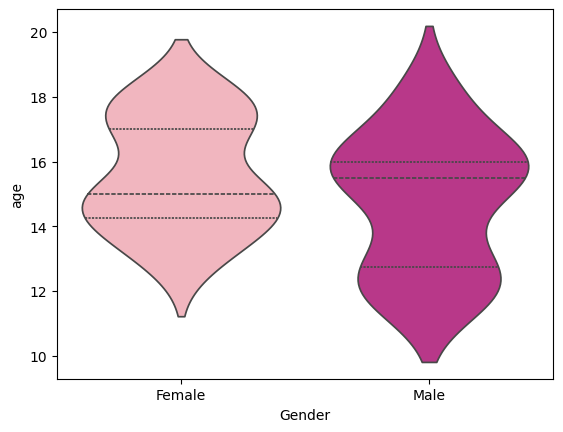

In [69]:
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
sns.violinplot(x='Gender',y='age',data= Athletes,inner='quartile',bw=0.5,hue='Gender',palette='RdPu')


Q51 List every athlete’s V02 ml/kg


In [75]:
df_VO2 = dataframe[['ID','VO2']].groupby(by='ID').sum().reset_index()
df_VO2 = df_VO2.merge(Athlete[['ID','First Name','Last Name','Weight']],on='ID')
df_VO2['VO2'] /= df_VO2['Weight']
for index, data in df_VO2.iterrows():
    print(f"{data['Last Name']},{data['First Name']} has {data['VO2']} VO2 ml/kg")

Martinez,Olivia has 42.807729834208565 VO2 ml/kg
Reynolds,Ethan has 38.63260242786477 VO2 ml/kg
Harper,Jackson has 69.7056566894772 VO2 ml/kg
Sanchez,Liam has 76.98987795262745 VO2 ml/kg
Thompson,Ava has 86.74257928964659 VO2 ml/kg
Rodriguez,Sophia has 71.67946489605183 VO2 ml/kg
Simmons,Grace has 38.403988289558235 VO2 ml/kg
Bennett,Aiden has 44.82209159820312 VO2 ml/kg
Price,Chloe has 49.69734195742557 VO2 ml/kg
Jordan,Lily has 55.12217097967687 VO2 ml/kg
Griffin,Isabella has 89.58690252924528 VO2 ml/kg
Dixon,Caleb has 92.25821153298837 VO2 ml/kg
Carpenter,Mia has 90.75869314593564 VO2 ml/kg
Mitchell,Harper has 54.869902099085074 VO2 ml/kg
Wallace,Mason has 66.93606586193701 VO2 ml/kg
Anderson,Logan has 69.66162171365058 VO2 ml/kg
Foster,Lucas has 73.78980600388472 VO2 ml/kg
Myers,Owen has 81.20877534899243 VO2 ml/kg


Q52 Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

Q53 phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill


In [48]:
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}
Jill_phno=phonebook["Jill"]
print("Jill's phone number is",Jill_phno)


Jill's phone number is 947662781


Q54 Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

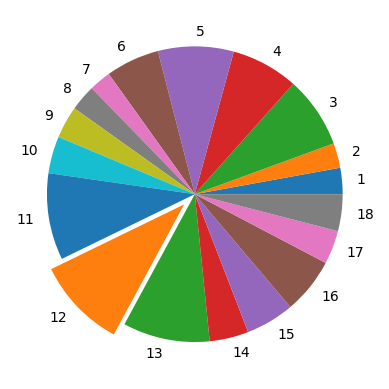

In [20]:
fig, ax = plt.subplots()
explode = df_VO2['VO2'].apply(lambda x: 0.1 if x==max(df_VO2['VO2']) else 0)
ax.pie(df_VO2['VO2'], labels=df_VO2.index, explode=explode)
plt.show()

Q55 Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

Q56 Display a histogram to show distribution of athletes by sport.

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Text(0, 0.5, 'Frequency')

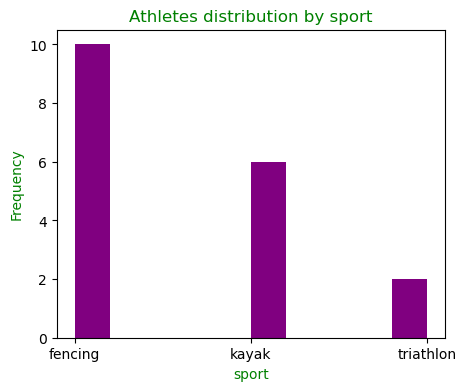

In [80]:
plt.figure(figsize=(5,4))
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
Athletes['sport'].hist(color='purple',grid= False)

#add labels and title
plt.title('Athletes distribution by sport',fontsize=12,color='green')
plt.xlabel('sport',fontsize=10,color='green')
plt.ylabel('Frequency',fontsize=10,color='green')




Q57 get the first letter of last name of students using for loops and RegEX

In [30]:
for i in Athlete['Last Name']:
    print(re.search('^.',i).group())

M
R
H
S
T
R
S
B
P
J
G
D
C
M
W
A
F
M


Q58 What is the average % difference in heart rate between warm up and GET for all athletes?

Q59 Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [82]:
tallest_athlete= Athlete.iloc[Athlete['Height'].idxmax()]
print(f"{tallest_athlete['Last Name']},{tallest_athlete['First Name']} is the tallest Athlete. His sport is {tallest_athlete['sport']} and his VO2 ml/kg is {df_VO2[df_VO2['ID']==tallest_athlete['ID']]['VO2'].values[0]}")

Harper,Jackson is the tallest Athlete. His sport is fencing and his VO2 ml/kg is 69.7056566894772


Q60 get the last letter      of athletes last names using RegEX

In [32]:
Athlete['Last Name'].apply(lambda x:re.search('(.)$',x).group())

0     z
1     s
2     r
3     z
4     n
5     z
6     s
7     t
8     e
9     n
10    n
11    n
12    r
13    l
14    e
15    n
16    r
17    s
Name: Last Name, dtype: object

Q61 Reverse an arrays order in Python. You can use any array with any values you like.

In [33]:
array = [1,2,3,4,5]
print(array[::-1])

[5, 4, 3, 2, 1]


Q62 What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [ ]:
#Successive differences for what?

Q63 On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [60]:
#Have to redo
total_time = 0
for i in Fencing['ID'].unique():
    df_temp = Fencing[Fencing['ID']==i]
    total_time += (df_temp['time'].iloc[-1]-df_temp['time'].iloc[0])/60 #in minutes
print('The Average Time spent by athletes in Fencing is:',total_time/len(Fencing['ID'].unique()),'minutes')


The Average Time spent by athletes in Fencing is: 20.30368 minutes


Q64 Count athletes based on Gender using count plot

<Axes: xlabel='count', ylabel='Gender'>

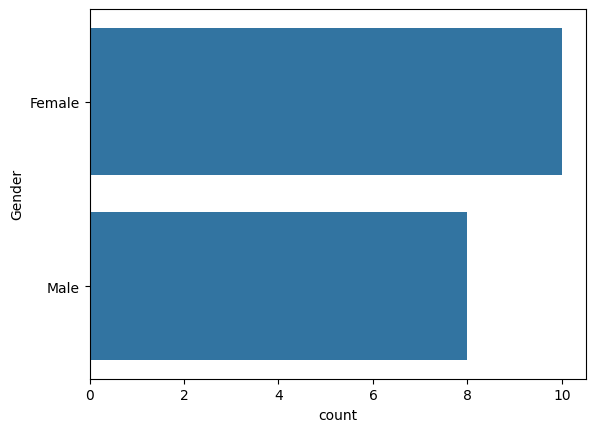

In [49]:
sns.countplot(Athlete['Gender'])